In [1]:
import pandas as pd # IMPORTS
import matplotlib.pyplot as plt
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

## Read the dataset in

1. Some characters aren't encoded in UTF-8 so I had to use ISO-8859-1 which worked
2. Got rid of the rows that aren't needed. I just kept the result (target) and the tweet (text)

In [2]:
df1 = pd.read_csv("../model-files/tweets.csv", names=['index','text','target']) # Need to set encode as ISO-8859-1 because file contains characters that are not encoded in UTF-8., this one works apparently

df2 = pd.read_csv("../model-files/tweets2.csv", names=['text','language','target'])

import json
# Read positive tweets
with open('../model-files/positive_tweets.json', 'r') as f:
    positive_tweets_data = [json.loads(line) for line in f]
with open('../model-files/negative_tweets.json', 'r') as f:
    negative_tweets_data = [json.loads(line) for line in f]

nltk_positive = pd.DataFrame(positive_tweets_data)
nltk_negative = pd.DataFrame(negative_tweets_data)
nltk_positive['target'] = 1
nltk_negative['target'] = 0

nltk_positive = nltk_positive.loc[:, ['target', 'text']]
nltk_negative = nltk_negative.loc[:, ['target', 'text']]
df3 = nltk_negative.append(nltk_positive)

df2 = df2.loc[:, ['target', 'text']]
df1 = df1.loc[:, ['target', 'text']]

# Also need to name the columns manually

/var/folders/wh/j0mpnsjn5dn3d140byhbb9h80000gn/T/ipykernel_8756/1180027961.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = nltk_negative.append(nltk_positive)


In [3]:
df1.head() # Check that the columns were processed correctly, these are 0 for "no depression" and 1 for "depression" so need to flip the columns

,target,text
0,0,just had a real good moment. i missssssssss hi...
1,0,is reading manga http://plurk.com/p/mzp1e
2,0,@comeagainjen http://twitpic.com/2y2lx - http:...
3,0,@lapcat Need to send 'em to my accountant tomo...
4,0,ADD ME ON MYSPACE!!! myspace.com/LookThunder


In [4]:
df1['target'] = df1['target'].apply(lambda x: 1 if x == 0 else 0) # Flip them
df1.head()

,target,text
0,1,just had a real good moment. i missssssssss hi...
1,1,is reading manga http://plurk.com/p/mzp1e
2,1,@comeagainjen http://twitpic.com/2y2lx - http:...
3,1,@lapcat Need to send 'em to my accountant tomo...
4,1,ADD ME ON MYSPACE!!! myspace.com/LookThunder


In [5]:
df2.head() # This right now has words, and 2 additional labels we won't be using

,target,text
0,litigious,@Charlie_Corley @Kristine1G @amyklobuchar @Sty...
1,negative,#BadBunny: Como dos gotas de agua: Joven se di...
2,litigious,https://t.co/YJNiO0p1JV Flagstar Bank disclose...
3,positive,Rwanda is set to host the headquarters of Unit...
4,litigious,OOPS. I typed her name incorrectly (today’s br...


In [6]:
# Define a dictionary to map sentiment values to 1 (positive) or 0 (negative)
def sentiment_map(target):
    if target == "positive":
        return 1
    if target == "negative":
        return 0
    else:
        return None

# Replace sentiment values according to the dictionary, and drop rows with 'neutral' or 'unknown'
df2['target'] = df2['target'].apply(sentiment_map)
df2.head()

,target,text
0,NaN,@Charlie_Corley @Kristine1G @amyklobuchar @Sty...
1,0.0,#BadBunny: Como dos gotas de agua: Joven se di...
2,NaN,https://t.co/YJNiO0p1JV Flagstar Bank disclose...
3,1.0,Rwanda is set to host the headquarters of Unit...
4,NaN,OOPS. I typed her name incorrectly (today’s br...


In [7]:
df2.dropna(subset=['target'], inplace=True)
df2.head()

,target,text
1,0.0,#BadBunny: Como dos gotas de agua: Joven se di...
3,1.0,Rwanda is set to host the headquarters of Unit...
5,0.0,It sucks for me since I'm focused on the natur...
6,0.0,@en_font Treballar a l’obra a partir dels 19 a...
8,0.0,Social Security. Constant political crises dis...


In [8]:
df3.head()

,target,text
0,0,hopeless for tmr :(
1,0,Everything in the kids section of IKEA is so c...
2,0,@Hegelbon That heart sliding into the waste ba...
3,0,"“@ketchBurning: I hate Japanese call him ""bani..."
4,0,"Dang starting next week I have ""work"" :("


In [9]:
df = df1.append(df2).append(df3)
df # Combine the dataframes!

/var/folders/wh/j0mpnsjn5dn3d140byhbb9h80000gn/T/ipykernel_8756/3296579896.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2).append(df3)
/var/folders/wh/j0mpnsjn5dn3d140byhbb9h80000gn/T/ipykernel_8756/3296579896.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2).append(df3)


,target,text
0,1.0,just had a real good moment. i missssssssss hi...
1,1.0,is reading manga http://plurk.com/p/mzp1e
2,1.0,@comeagainjen http://twitpic.com/2y2lx - http:...
3,1.0,@lapcat Need to send 'em to my accountant tomo...
4,1.0,ADD ME ON MYSPACE!!! myspace.com/LookThunder
...,...,...
4995,1.0,"@chriswiggin3 Chris, that's great to hear :) D..."
4996,1.0,@RachelLiskeard Thanks for the shout-out :) It...
4997,1.0,@side556 Hey! :) Long time no talk...
4998,1.0,@staybubbly69 as Matt would say. WELCOME TO AD...


### Plot the data to get an idea of the split

We already  know for certain NLTK's dataset for df3 is a perfect split though

<AxesSubplot: >

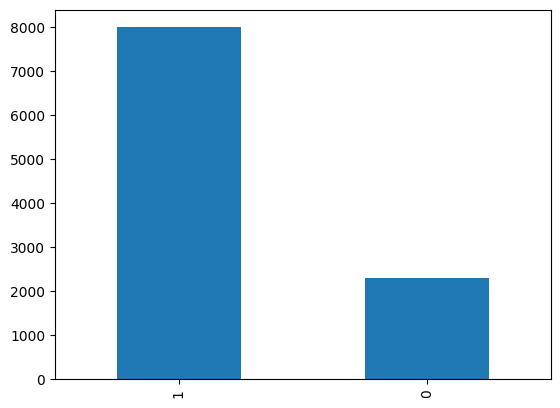

In [10]:
df1['target'].value_counts().plot(kind='bar') # A lot more positive than negative

<AxesSubplot: >

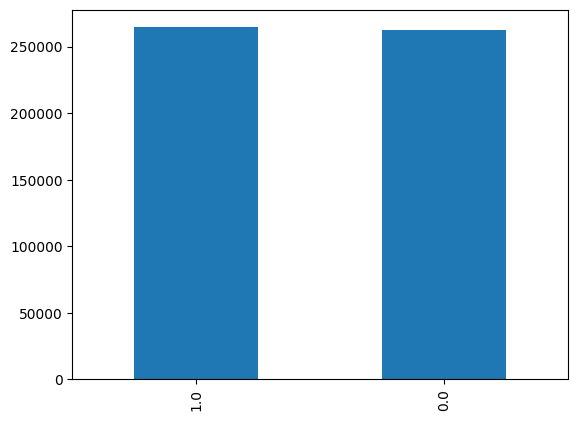

In [11]:
df2['target'].value_counts().plot(kind='bar') # Even split

## Data Preprocessing
1. Load in stop words from NLTK to be used. These words should be removed as they don't help us determine sentiment and just serve to throw off our prediction
2. Use regex with the re library to remove links to websites and Twitter user handle mentions with @
3. Remove numbers
4. Remove punctuation
5. If a word has 3 or more consecutive letters, standardize it to have only 2
6. "Lemmatize" the word to reduce it to its root form, ex: change, changing, changes, changed, changer would all map to change

In [12]:
with open("../model-files/stop-words.txt") as f:
    stopwords = [line.strip() for line in f]
stopwords = set(stopwords)
stopwords # Check the stop words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

### Method that deals with the bulk of the pre-processing

Will map this function to each Tweet in the DataFrame

In [13]:
def preprocess_tweet(tweet):
    # Convert to lowercase
    tweet = tweet.lower()
    # Remove URLs. Match words that begin with http, http\S+, www, etc... and \S+ which is just one or more non-whitespace characters
    tweet = re.sub(r'\shttp\S+|\swww\S+|\shttps\S+', ' URL ', tweet, flags=re.MULTILINE)

    # Do they same as above but match with anything that ends with .com, .net, or website endings
    tweet = re.sub(r'\S+.com\s|\S+.net\s|\S+.org\s|\S+.co\s|\S+.us\s|\S+.edu\s|\S+.me\s|\S+.cn\s|\S+.uk\s|\S+.cn\s', ' URL ', tweet, flags=re.MULTILINE)
    # Get rid of @ mentions from the tweet dataset
    tweet = re.sub(r'@\S+', '', tweet, flags=re.MULTILINE)

    # Remove punctuation
    tweet = re.sub(r'\W', ' ', tweet)
    # Remove digits
    tweet = re.sub(r'\d+', '', tweet)

    # Tokenize the tweet (just store each word into a list)
    tokens = word_tokenize(tweet)

    tokens = [token for token in tokens if token not in stopwords] # Keep the ones that aren't a stop word
    # Lemmatize tokens, converting it back to its base form
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]


    # If a word has more than 3 consecutive characters, make it 2 characters instead
    for i in range(len(tokens)):
        chars_to_delete = list()
        for j in range(len(tokens[i]) - 2):
            if tokens[i][j] == tokens[i][j+1] and tokens[i][j] == tokens[i][j+2]:
                chars_to_delete.append(tokens[i][j])
        tokens[i] = list(tokens[i]) # Turn it into a list to delete specified values
        for ch in chars_to_delete: # Delete based off of the characters stored in chars_to_delete
            tokens[i].remove(ch)
        tokens[i] = "".join(tokens[i]) # Convert back into a string

    tokens = [token for token in tokens if len(token) > 1] # Get rid of random letters out and about from punctuation removal

    # Join tokens back into a string
    cleaned_tweet = ' '.join(tokens)
    return cleaned_tweet

### Playing around with regex

In [14]:
tweet = "@switchfoot http://twitpic.com/2y1zl - Awww, that'ssss a bummmmmmmer.  You shoulda got David Caaarrr of Third Day to do it. ;D"

preprocess_tweet(tweet)

'URL aww ss bummer shoulda got david caarr third day'

In [15]:
test = "before www.google.com happy playing"
test = re.sub(r'\S+.com\s|\S+.net\s|\S+.org\s|\S+.co\s|\S+.us\s|\S+.edu\s|\S+.me\s|\S+.cn\s|\S+.uk\s|\S+.cn\s', '', test, flags=re.MULTILINE)
test

'before happy playing'

In [16]:
test = "before @Kevin.Bruh I think you"
test = re.sub(r'\W', ' ', test)
tokens = word_tokenize(test)
tokens

['before', 'Kevin', 'Bruh', 'I', 'think', 'you']

## Final Stage

Apply the preprocess method on each row of the DataFrame and then save the processed data as a csv file to be worked with in inference_data.ipynb

In [17]:
df['clean'] = df['text'].apply(preprocess_tweet) 

In [18]:
df

,target,text,clean
0,1.0,just had a real good moment. i missssssssss hi...,real good moment miss much
1,1.0,is reading manga http://plurk.com/p/mzp1e,reading manga URL
2,1.0,@comeagainjen http://twitpic.com/2y2lx - http:...,URL URL
3,1.0,@lapcat Need to send 'em to my accountant tomo...,need send em accountant tomorrow oddly even re...
4,1.0,ADD ME ON MYSPACE!!! myspace.com/LookThunder,URL myspace myspace com lookthunder
...,...,...,...
4995,1.0,"@chriswiggin3 Chris, that's great to hear :) D...",chris great hear due time amp reminder indeed ...
4996,1.0,@RachelLiskeard Thanks for the shout-out :) It...,thanks shout great aboard
4997,1.0,@side556 Hey! :) Long time no talk...,hey long URL talk
4998,1.0,@staybubbly69 as Matt would say. WELCOME TO AD...,matt would say URL adulthood URL


In [19]:
positive = df[df['target'] == 1]
negative = df[df['target'] == 0]

In [20]:
positive.to_csv('../model-files/positive-cleaned.csv', index=False) # Export the cleaned tweet dataframe as a new CSV file
negative.to_csv('../model-files/negative-cleaned.csv', index=False)